In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
Looking at frequency dependent resistivity
"""

'\nLooking at frequency dependent resistivity\n'

In [3]:
# Make a grid of ions
x = np.linspace(-10, 10, 50) # x-spacing
z = np.linspace(0, -50, 50) # z-spacing
gridx, gridz = np.meshgrid(x, z)

pos = np.zeros(gridx.shape) + 1
neg = np.zeros(gridx.shape) - 1
print(pos.shape)

(50, 50)


Text(0.5, 1.0, 'Slight Charge Seperation of Ions Across an \nEquipotential Shell with a 1D VES Measurement')

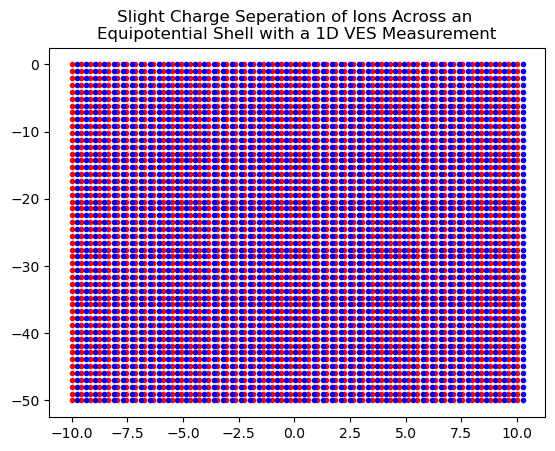

In [4]:
plt.plot(gridx, gridz, "r.")
plt.plot(gridx + 0.25, gridz, "b.")
plt.title("Slight Charge Seperation of Ions Across an \nEquipotential Shell with a 1D VES Measurement")

In [5]:
# Only negative ions move
# Determine force under each charge (force from applied electric field - force from any
# impermeable boundaries)
# Based on force, calculate displacement
# Update potential for time step

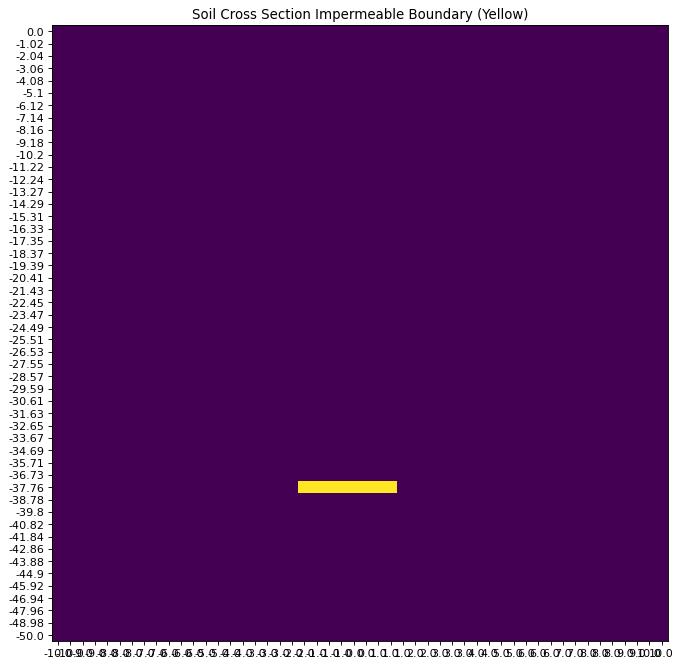

In [29]:
# setting impermeable boundaries

boundary = np.zeros(gridx.shape)
boundary[np.where(gridx[0,:]>5)[0][0], 20:28] += 1
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.imshow(boundary)
plt.gca().set_xticks(range(len(x)))
plt.gca().set_yticks(range(len(z)))
plt.gca().set_xticklabels(np.round(x, 0))
plt.gca().set_yticklabels(np.round(z, 2))
plt.title("Soil Cross Section Impermeable Boundary (Yellow)")

plt.show()

In [30]:
def dz(app_current, xpos, zpos, boundary, real_resistance, capacitance=1):
    q = 1e-1
    
    V = app_current*real_resistance # only apply an upward displacement
    
    boundary = [-2, 2, -45, -44]
    bound = np.where(((zpos < boundary[2]) | (zpos > boundary[3])) & ((xpos < boundary[0]) | (xpos > boundary[1])))
    # bound2 = np.where()
    bound2 = np.where(((zpos > boundary[2]) & (zpos < boundary[3])) & ((xpos > boundary[0]) & (xpos < boundary[1])))

    V += capacitance*np.prod(xpos[bound2].shape)*q 
    # dV = q/dx^2, dx = (q/dV)^0.5
    #print(bound)
    
    dz = q**2/V**0.5
    
    mdz = np.zeros(xpos.shape) + dz
    mdz[bound2] = 0
    znew = np.copy(zpos)
    znew -= mdz
    # print(znew[bound2])
    return xpos, znew, V

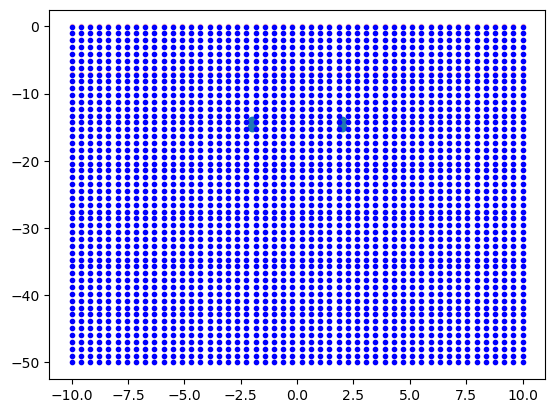

In [31]:
# Calculate displacement for one time step

plt.plot(gridx, gridz, "r.", alpha=0.2)
xnew, znew, v = dz(0.02, gridx, gridz, boundary, 200)
plt.plot(xnew, znew, "b.")
plt.scatter([-2, -2, 2, 2], [-15, -14, -15, -14])
plt.show()

#np.where(np.abs(gridx*boundary - xnew) < 0.5)

# print(np.where(np.abs(gridz*boundary - znew)<0.5))
#np.where(np.abs(gridz*boundary - znew) > 0.5)

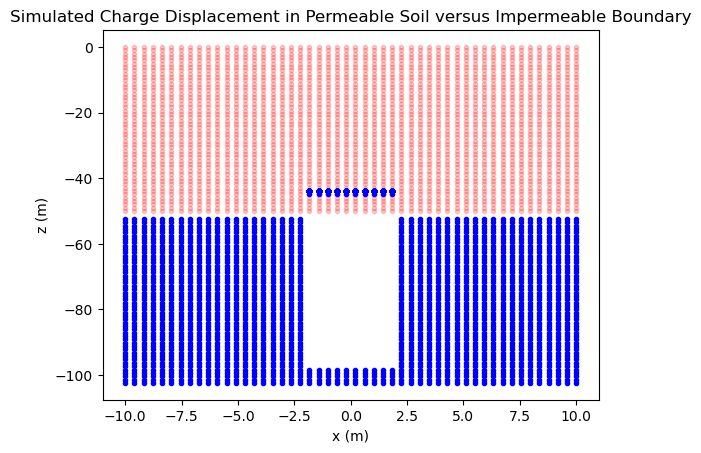

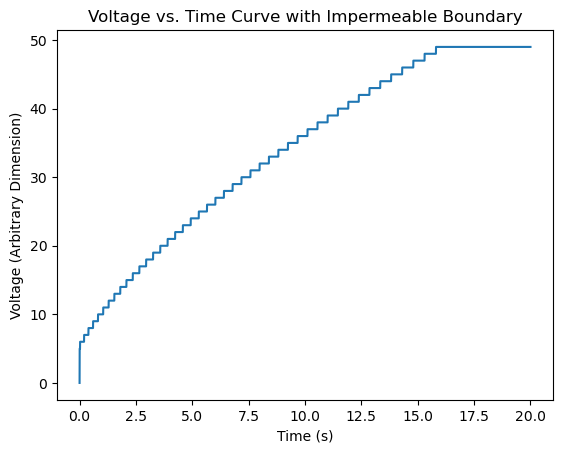

Text(0, 0.5, 'Current (Arbitrary Dimension)')

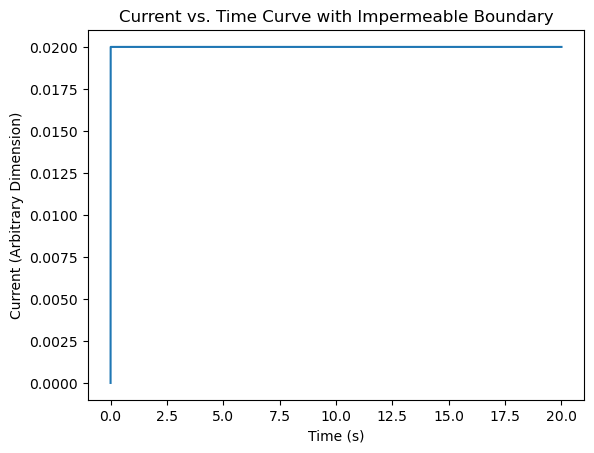

In [37]:
# Calculate for 20 time steps
t = list(np.linspace(0, 20, 28000))
vs = [0]
xnew, znew, v = dz(0.02, gridx, gridz, boundary, 200)
for i in range(1,len(t)):
    xnew, znew, v = dz(0.02, xnew, znew, boundary, 200)
    #boundary[np.where(gridx[0,:]==0)[0][0], 10:-8] -= 1
    #boundary[np.where(boundary==0)[0][0] - i, 10:-8] += 1
    vs.append(v)
plt.plot(gridx, gridz, "r.", alpha=0.2)
plt.title("Simulated Charge Displacement in Permeable Soil versus Impermeable Boundary")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.plot(xnew, znew, "b.")
plt.show()

plt.plot(t, vs)
plt.title("Voltage vs. Time Curve with Impermeable Boundary")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (Arbitrary Dimension)")
plt.show()

I = np.zeros(len(vs))
I[1:] = 0.02
plt.plot(t, I)
plt.title("Current vs. Time Curve with Impermeable Boundary")
plt.xlabel("Time (s)")
plt.ylabel("Current (Arbitrary Dimension)")

In [55]:
#TODO: SIMULATE FREQUENCY DEPENDENT CONDUCTIVITY
#TODO: PUT EVERYTHING IN TERMS OF CHARGE DENSITY SO YOU DON'T RUN OUT OF CHARGES
#TODO: PUT THINGS IN CORRECT UNITS

In [ ]:
# Simulating OhmPi aquisistion data
